                            OLS Regression Results                            
Dep. Variable:         HappinessScore   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     48.55
Date:                Sun, 29 Mar 2020   Prob (F-statistic):           7.05e-27
Time:                        17:38:44   Log-Likelihood:                -120.66
No. Observations:                 122   AIC:                             253.3
Df Residuals:                     116   BIC:                             270.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4899      0.461  

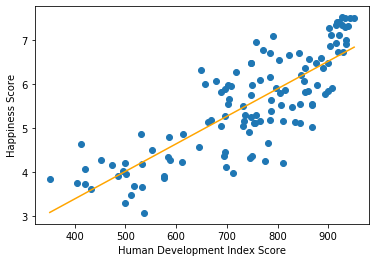

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
import scipy.stats

# data obtained from https://www.kaggle.com/marcospessotto/happiness-and-alcohol-consumption

dframe = pd.read_csv('HappinessAlcoholConsumption.csv')

y = dframe['HappinessScore']

x = dframe[['HDI', 'GDP_PerCapita','Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']]

x = sm.add_constant(x) 

mod = sm.OLS(y, x).fit()
predict = mod.predict(x) 

print_mod = mod.summary()
print(print_mod)

# plotting the data

plt.scatter(dframe['HDI'], dframe['HappinessScore'])
plt.xlabel("Human Development Index Score")
plt.ylabel("Happiness Score")

result1 = scipy.stats.linregress(dframe['HDI'], dframe['HappinessScore'])

yhat = dframe['HDI']*result1[0]+result1[1]+result1[-1]

plt.plot(np.sort(dframe['HDI']), np.sort(yhat), color="orange")
plt.show()
